# Statistical Testing in Python

This python notebook recreates a subset of the original analysis found in [Airbnb Prices in New York City](https://github.com/rae-fahrenholtz/airbnb-nyc). The goal is to use ggplot (grammar of graphics) to explore data aggregation and plotting options. Julia and R versions of this analysis are also available for comparison.

The data was collected in 2019 and originates from Kaggle, [new-york-city-airbnb-open-data](www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). The dataset of 16 columns and 50k rows has been copied to the server so this notebook may access it.
```
A copy is found at `devops@nodeholder.com:/home/devops/data`.

RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   name                      object 
 2   host_id                   int64  
 3   host_name                 object 
 4   neighbourhood_group       object      Coarse Grain Categorical
 5   neighbourhood             object      Fine Grain Nominal
 6   latitude                  float64     Fine Grain Continuous
 7   longitude                 float64     Fine Grain Continuous
 8   room_type                 object      Course Grain Categorical
 9   price                     int64       Fine Grain Continuous
 10  minimum_nights            int64  
 11  number_of_reviews         int64  
 12  last_review               object
 13  reviews_per_mont          float64
 14  calculate..stings_count   int64  
 15  availability_365          int64  
```

It consists of 16 Columns and 48895 rows. We are interested in the following columns

```
 4   neighbourhood_group       object      Coarse Grain Categorical
 8   room_type                 object      Course Grain Categorical
 9   price                     int64       Fine Grain Continuous
 ```
# Configuration
This notebook is being served by a linux process owned by the user devops. All data, including programs, are found under /home/devops including: `/home/devops/.pyenv`, `/home/devops/.juypter`, `/home/devops/.julia`

- Login as devops@nodeholder.com. We are using the ~/src/ds-study-group/

# Research Questions
For Airbnb rentals in 2019 in New York City:

1. Is the average rental price significantly different for different room types?
2. Is the average rental price significantly different in different neighborhoods?
3. Is the average rental price for different neighborhoods and room types combinations significantly different?

In [2]:
import pandas as pd
import numpy as np

In [3]:
!pwd

/home/devops/src/ds-study-group/notebooks/airbnb-nyc


In [4]:
# ln -s /home/devops/data/AB_NYC_2019.csv
!ls

AB_NYC_2019.csv  airbnb-nyc-python.ipynb  your_report.html


In [5]:
df = pd.read_csv('./AB_NYC_2019.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("your_report.html")

In [8]:
pd.concat([df['price'], df['room_type'], df['neighbourhood_group']], axis=1).head(7)

,price,room_type,neighbourhood_group
0,149,Private room,Brooklyn
1,225,Entire home/apt,Manhattan
2,150,Private room,Manhattan
3,89,Entire home/apt,Brooklyn
4,80,Entire home/apt,Manhattan
5,200,Entire home/apt,Manhattan
6,60,Private room,Brooklyn


To produce a plot with the ggplot class from plotnine, we must provide three things:

1. A data frame containing our data.
2. How the columns of the data frame can be translated into positions, colors, sizes, and shapes of graphical elements ("aesthetics").
3. The actual graphical elements to display ("geometric objects").


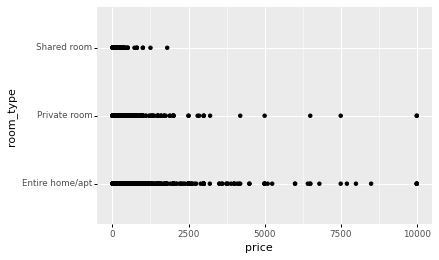

<ggplot: (8763234754705)>

In [9]:
from plotnine import *
ggplot(df, aes(x='price', y='room_type')) + geom_point()

/home/devops/src/ds-study-group/ds-dev/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 239 rows containing non-finite values.
/home/devops/src/ds-study-group/ds-dev/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 6 rows containing missing values.


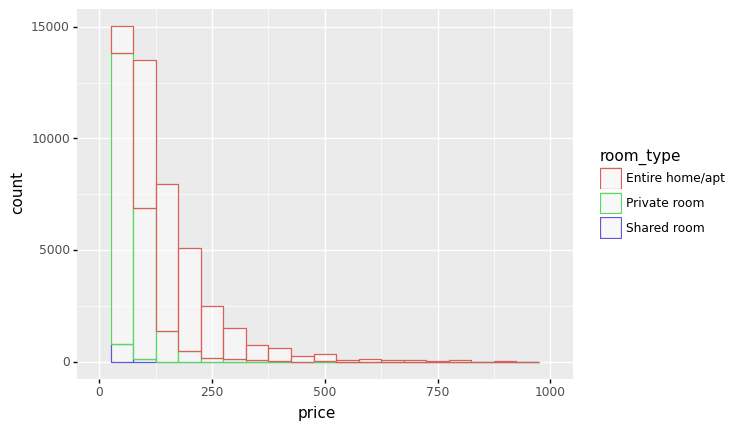

<ggplot: (8763232612840)>

In [10]:
ggplot(df, aes(x='price',color="room_type")) +\
    geom_histogram(binwidth=50,\
        alpha=0.5,\
        fill="white") +\
    xlim(0,1000)

/home/devops/src/ds-study-group/ds-dev/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 239 rows containing non-finite values.
/home/devops/src/ds-study-group/ds-dev/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 6 rows containing missing values.


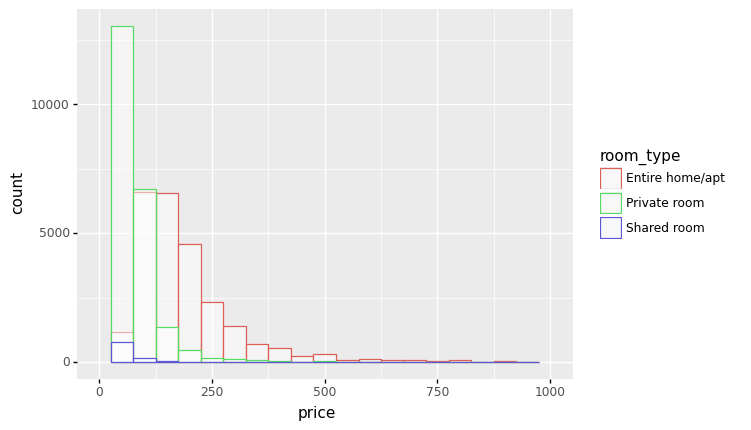

<ggplot: (8763232564372)>

In [11]:
ggplot(df, aes(x='price',color="room_type")) +\
    geom_histogram(binwidth=50,\
        alpha=0.5,\
        position="identity",\
        fill="white") +\
    xlim(0,1000)